## This notebook shows how to convert back and forth from Fe3Fet to different redox buffer positions.
- You can download the spreadsheet here:

In [1]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Load in data
- No suffix in file, so add here to say they are liquids

In [15]:
load=pt.import_excel('Redox_Conversions.xlsx', sheet_name="Liqs", suffix='_Liq')
Liqs=load['Liqs']
Liqs.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.508277,0.0,0.0,0.0,0.0,0
1,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.0,0.253478,0.518386,0.0,0.0,0.0,0.0,1
2,51.491657,2.771451,13.666925,11.521905,0.200504,6.275374,10.459901,2.509225,0.520502,0.0,0.268098,0.548285,0.0,0.0,0.0,0.0,2
3,51.508276,2.872896,13.569897,11.795709,0.208908,6.138356,10.217900,2.543802,0.541088,0.0,0.279336,0.571268,0.0,0.0,0.0,0.0,3
4,51.506960,3.058952,13.350351,12.214913,0.223782,5.856971,9.977521,2.592645,0.577148,0.0,0.299224,0.611940,0.0,0.0,0.0,0.0,4


## Example 1: Calculating Fe3Fet for a series of liquid compositions
- Remember, Fe3Fet_Liq to buffer positions is very dependent on temperature, so first we need to choose a thermometer

In [16]:
# Calculate temperature
T_HT87=pt.calculate_liq_only_temp(liq_comps=Liqs, equationT='T_Helz1987_MgO')

### 1a: Using a value for logfo2

In [17]:
logfo2=-7.58429552677443

# Calculate oxides using Kress 1991 and 3 kbar, and 
myLiquids_Fe3_Kress_norm=pt.convert_fo2_to_fe_partition(liq_comps=Liqs, T_K=T_HT87, 
                            P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq
0,51.573474,2.607633,13.559981,2.813568,8.606944,0.186298,6.713780,10.999680,2.412425,0.484906,0.249103,0.227286
1,51.582033,2.647602,13.749479,2.869927,8.617879,0.190011,6.513072,10.839765,2.456826,0.494572,0.254069,0.230563
2,51.620474,2.778399,13.701184,2.993012,8.856176,0.201006,6.291105,10.486121,2.515515,0.521807,0.268770,0.233184
3,51.644329,2.880498,13.605809,3.084121,9.050289,0.209461,6.154600,10.244940,2.550534,0.542520,0.280075,0.234673
4,51.654905,3.067754,13.388765,3.261699,9.313550,0.224426,5.873824,10.006230,2.600105,0.578808,0.300085,0.239613


Text(0, 0.5, 'Fe3Fet Liq')

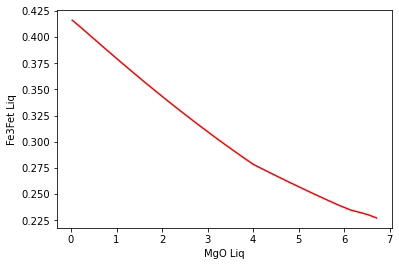

In [19]:
plt.plot(myLiquids_Fe3_Kress_norm['MgO_Liq'], myLiquids_Fe3_Kress_norm['Fe3Fet_Liq'], '-r')
plt.xlabel('MgO Liq')
plt.ylabel('Fe3Fet Liq')

### 1b: At a known buffer (here, QFM)

In [21]:
# Calculate oxides using Kress 1991 and 3 kbar, and 
myLiquids_Fe3_Kress_norm_QFM=pt.convert_fo2_to_fe_partition(liq_comps=Liqs, T_K=T_HT87, 
                            P_kbar=3, fo2="QFM", model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm_QFM.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq
0,51.621424,2.610058,13.572588,1.881698,9.456264,0.186471,6.720022,11.009907,2.414668,0.485357,0.249335,0.151860
1,51.632661,2.650201,13.762974,1.886144,9.514574,0.190198,6.519464,10.850404,2.459237,0.495057,0.254318,0.151373
2,51.675308,2.781350,13.715738,1.928249,9.827054,0.201220,6.297788,10.497260,2.518187,0.522361,0.269056,0.150063
3,51.702115,2.883721,13.621032,1.962512,10.073308,0.209695,6.161487,10.256404,2.553387,0.543127,0.280389,0.149155
4,51.718628,3.071538,13.405281,2.025025,10.442040,0.224702,5.881070,10.018574,2.603312,0.579522,0.300455,0.148573


Text(0, 0.5, 'Fe3Fet Liq')

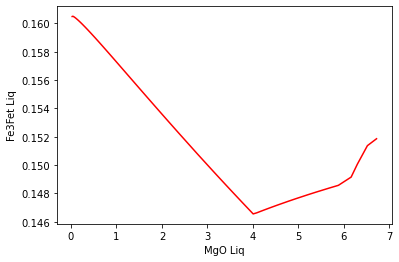

In [22]:
plt.plot(myLiquids_Fe3_Kress_norm_QFM['MgO_Liq'], myLiquids_Fe3_Kress_norm_QFM['Fe3Fet_Liq'], '-r')
plt.xlabel('MgO Liq')
plt.ylabel('Fe3Fet Liq')

## At buffer with offset (here NNO+1)

In [24]:
# Calculate oxides using Kress 1991 and 3 kbar, and 
myLiquids_Fe3_Kress_norm_NNO1=pt.convert_fo2_to_fe_partition(liq_comps=Liqs, T_K=T_HT87, 
                            P_kbar=3, fo2="NNO", fo2_offset=1, model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm_NNO1.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq
0,51.546390,2.606264,13.552860,3.339932,8.127207,0.186200,6.710254,10.993904,2.411158,0.484651,0.248972,0.269955
1,51.557365,2.646336,13.742904,3.349248,8.180990,0.189920,6.509957,10.834581,2.455651,0.494335,0.253947,0.269205
2,51.598076,2.777193,13.695239,3.427946,8.459594,0.200919,6.288375,10.481571,2.514423,0.521581,0.268654,0.267191
3,51.623335,2.879327,13.600278,3.491627,8.678603,0.209376,6.152098,10.240776,2.549497,0.542300,0.279962,0.265793
4,51.637241,3.066705,13.384186,3.604510,9.000728,0.224349,5.871815,10.002808,2.599216,0.578610,0.299982,0.264891


Text(0, 0.5, 'Fe3Fet Liq')

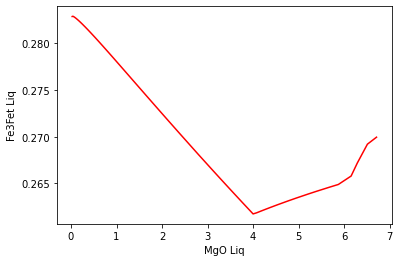

In [25]:
plt.plot(myLiquids_Fe3_Kress_norm_NNO1['MgO_Liq'], myLiquids_Fe3_Kress_norm_NNO1['Fe3Fet_Liq'], '-r')
plt.xlabel('MgO Liq')
plt.ylabel('Fe3Fet Liq')

## So far, we used Norm, this renormalizes the other oxides to account for the changing FeO and Fe2O3 amount, can also put false, doesn't affect the Fe3FeT but affects the oxide concs

In [29]:
logfo2=-7.58429552677443
print('Original')
display(Liqs.loc[[0]])

# No renormalizatoin
myLiquids_Fe3_Kress_nonorm=pt.convert_fo2_to_fe_partition(liq_comps=Liqs.loc[[0]], T_K=T_HT87.loc[[0]], 
                            P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=False)
print('No Norm')
display(myLiquids_Fe3_Kress_nonorm)


# With renormalization 
myLiquids_Fe3_Kress_norm=pt.convert_fo2_to_fe_partition(liq_comps=Liqs.loc[[0]], T_K=T_HT87.loc[[0]], 
                            P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=True)
print('Renorm')
display(myLiquids_Fe3_Kress_norm)


Original


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.456179,2.60169,13.529073,11.11461,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.508277,0.0,0.0,0.0,0.0,0


No Norm


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2
0,51.456179,2.60169,13.529073,11.11461,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.508277,0.227286,0.0,0.0,0.0,0,8.589075,2.807726,0.147152


Renorm


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq
0,51.573474,2.607633,13.559981,2.813568,8.606944,0.186298,6.71378,10.99968,2.412425,0.484906,0.249103,0.227286
